In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [17]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 6]
sns.set()

In [18]:
coal_consump = pd.read_csv('coal_consump_monthly.csv', parse_dates = False, index_col = 'YYYYMM')
coal_consump = coal_consump.drop(['MSN','Unit','Description','Column_Order'], 1)
import datetime
coal_consump.index = (datetime.datetime.strptime(str(i),"%Y%m") for i in coal_consump.index)
coal_consump

,Value
2000-01-01,97043.237
2000-02-01,88029.479
2000-03-01,86379.330
2000-04-01,78212.149
2000-05-01,85275.298
...,...
2020-06-01,39837.864
2020-07-01,52932.595
2020-08-01,53635.454
2020-09-01,41832.812


In [19]:
coal_consump = coal_consump[12:241]
coal_consump

,Value
2001-01-01,96896.583
2001-02-01,83772.227
2001-03-01,86499.188
2001-04-01,78371.593
2001-05-01,84604.868
...,...
2019-09-01,51112.886
2019-10-01,41517.246
2019-11-01,45868.741
2019-12-01,44574.382


In [20]:
upsampled_coal = coal_consump.resample('W').ffill()
upsampled_coal.drop(upsampled_coal.tail(1).index,inplace=True)
upsampled_coal

,Value
2001-01-07,96896.583
2001-01-14,96896.583
2001-01-21,96896.583
2001-01-28,96896.583
2001-02-04,83772.227
...,...
2019-12-01,44574.382
2019-12-08,44574.382
2019-12-15,44574.382
2019-12-22,44574.382


In [21]:
sigma = upsampled_coal.std()
mu = 0 # mean and standard deviation
variations = np.random.normal(mu, sigma*np.sqrt(1/4), 991)
variations

array([-2.55014409e+02, -7.72362263e+03,  3.63710466e+03,  4.85703890e+03,
       -2.23237238e+04,  9.77962288e+02,  6.49311213e+02,  1.29812354e+04,
       -1.17111351e+04,  3.62322490e+01, -1.81151797e+04, -1.15362343e+04,
        1.20729819e+04, -6.51051138e+03, -1.45672489e+03, -4.45919332e+03,
        2.20345256e+03, -2.79458821e+03, -1.29829757e+04,  4.02049071e+03,
        7.17101121e+03,  1.14506368e+03,  1.94664870e+04,  5.66620507e+02,
        5.83332740e+03, -1.05604146e+04, -5.05394398e+03,  1.56482883e+03,
       -3.96562747e+02, -3.51119326e+02,  2.97073140e+02, -1.42361490e+04,
       -4.85487740e+03, -3.45855571e+03, -1.88128850e+01, -5.67620776e+03,
        1.32572408e+04, -1.20804559e+02, -4.36460850e+03, -1.06582742e+03,
        2.73409527e+03,  8.01825127e+03,  1.96995219e+04, -4.80980774e+03,
        1.13015206e+04,  1.59079206e+03,  7.42993071e+02, -5.70296005e+03,
       -1.31882362e+03, -4.73980338e+03,  2.67007681e+03, -1.19381699e+04,
        4.58529575e+03,  

In [22]:
upsampled_coal_series = pd.DataFrame.to_numpy(upsampled_coal).flatten()
upsampled_coal_series = upsampled_coal_series + variations

In [23]:
upsampled_coal_series

array([ 96641.56859146,  89172.96036915, 100533.68765619, 101753.62189527,
        61448.50320951,  84750.18928804,  84421.53821302,  96753.46242026,
        74788.05290428,  86535.42024895,  68384.0083352 ,  74962.95365482,
        90444.57487819,  71861.08161698,  76914.86810743,  73912.39968474,
        80575.04556071,  81810.27979442,  71621.89233845,  88625.3587091 ,
        91775.87921446,  91169.67267968, 109491.09595888,  90591.22950734,
        95857.93640482,  88596.12135456,  94102.59202039, 100721.36482544,
        98759.97325342,  98805.41667412, 101402.4441399 ,  86869.22198941,
        96250.49359661,  97646.81529095,  86686.25911496,  81028.86423786,
        99962.31282627,  86584.26744076,  82340.46349651,  82445.40558418,
        86245.32826677,  91529.48426528, 103210.75489117,  76203.64925946,
        92314.97755261,  82604.24906291,  81756.45007129,  82781.83495023,
        87165.97137606,  83744.99161998,  91154.87180734,  76546.62513589,
        94589.00275139, 1

In [24]:
upsampled_coal['Value']  = upsampled_coal_series
upsampled_coal

,Value
2001-01-07,96641.568591
2001-01-14,89172.960369
2001-01-21,100533.687656
2001-01-28,101753.621895
2001-02-04,61448.503210
...,...
2019-12-01,43325.230944
2019-12-08,39751.667961
2019-12-15,48847.790991
2019-12-22,50008.885420


In [25]:
upsampled_coal_01_08 = upsampled_coal[:417]
upsampled_coal_01_08

,Value
2001-01-07,96641.568591
2001-01-14,89172.960369
2001-01-21,100533.687656
2001-01-28,101753.621895
2001-02-04,61448.503210
...,...
2008-11-30,93144.238565
2008-12-07,93097.536737
2008-12-14,96031.189959
2008-12-21,94626.387757


In [26]:
upsampled_coal_09_19 = upsampled_coal[417:]
upsampled_coal_09_19

,Value
2009-01-04,80527.669711
2009-01-11,81500.879526
2009-01-18,97916.981766
2009-01-25,84498.026606
2009-02-01,89510.777453
...,...
2019-12-01,43325.230944
2019-12-08,39751.667961
2019-12-15,48847.790991
2019-12-22,50008.885420


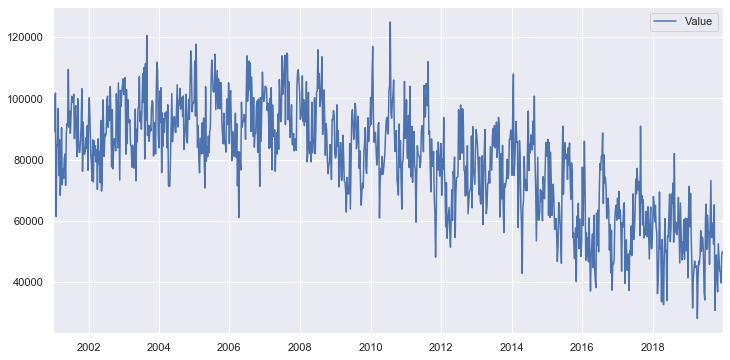

In [27]:
upsampled_coal.plot.line()

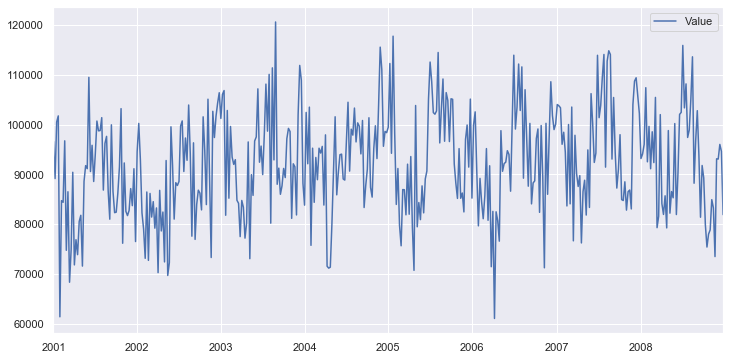

In [28]:
upsampled_coal_01_08.plot.line()

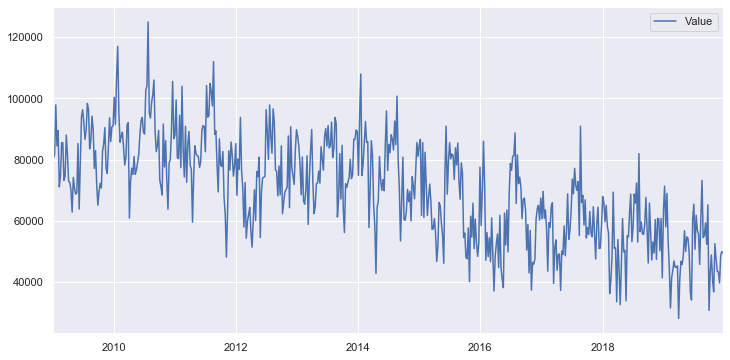

In [29]:
upsampled_coal_09_19.plot.line()

In [30]:
upsampled_coal_01_08.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/coal_consump_01_08.csv')

In [31]:
upsampled_coal_09_19.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/coal_consump_09_19.csv')